<a href="https://colab.research.google.com/github/QuinnWass/CPSC-4310-01/blob/master/DAP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quinn Wass

Brigid Kelly




In [0]:
import pandas as pd
import re
import nltk
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm, tqdm_gui, tqdm_notebook


%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)


from scipy import stats


parts_of_speech = ['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ',
                    'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS', 'NNP',
                    'NNPS', 'PDT', 'PRP$', 'RB', 'RBR', 'PRP', 'RBS',
                    'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP',
                    'VBZ', 'WDT', 'WP', 'WP$', 'WRB' ]



In [0]:
#Load dataset into df
dataset = 'https://raw.githubusercontent.com/QuinnWass/CPSC-4310-01/master/FakeNewsClassifier/processeddata/cb_full_parsed.csv'
df = pd.read_csv(dataset)


#this is to get rid of the XX.1 thing we have going on for some reason when
#the dataframe is loaded.
df = df.drop(columns = parts_of_speech)
parts_of_speech_dict = {'CC.1':'CC', 'CD.1':'CD', 'DT.1':'DT', 'EX.1':'EX', 'FW.1':'FW', 'IN.1':'IN', 'JJ.1':'JJ', 'JJR.1':'JJR', 'JJS.1':'JJS', 'LS.1':'LS', 'MD.1':'MD',
                   'NN.1':'NN', 'NNS.1':'NNS', 'NNP.1':'NNP', \
                    'NNPS.1':'NNPS', 'PDT.1':'PDT', 'PRP$.1':'PRP$', 'RB.1':'RB', 'RBR.1':'RBR', 'PRP.1':'PRP', 'RBS.1':'RBS', \
                    'RP.1':'RP', 'TO.1':'TO', 'UH.1':'UH', 'VB.1':'VB', 'VBD.1':'VBD', 'VBG.1':'VBG', 'VBN.1':'VBN', 'VBP.1':'VBP', \
                    'VBZ.1':'VBZ', 'WDT.1':'WDT', 'WP.1':'WP', 'WP$.1':'WP$', 'WRB.1':'WRB' }
df = df.rename(columns=parts_of_speech_dict)

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [0]:
#for pos in parts_of_speech:
 #   sns.relplot(x=pos, y="word_count", data=df);

In [0]:
#for pos in parts_of_speech:
 #   sns.relplot(x=pos, y="title_word_count", data=df);

As can we seen, there are several correlations that can be modeled using regression

In [0]:
#or pos in parts_of_speech:
 #   sns.relplot(x=pos, y="sentiment", data=df);

Unfortunetley this is not the case for the sentiment

In [0]:
#for pos in parts_of_speech:
 #   sns.relplot(x=pos, y="title_sentiment", data=df);

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

In [0]:
#appending additional features to the parts of speech array
#as our exploratory analysis has shown they may be a factor

X_df = df[parts_of_speech]
y_df = df[['word_count']]
X = X_df.values
y = y_df.values

# Linear Regression


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linreg = LinearRegression().fit(X_train_scaled, y_train)

print('Fake News dataset')
print('Linear regression linear model intercept: {}'
     .format(linreg.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linreg.coef_[0]))
print('Non-zero features: {}'
     .format(np.sum(linreg.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_df), linreg.coef_[0])),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Fake News dataset
Linear regression linear model intercept: [-0.00792444]
lasso regression linear model coeff:
[ 6.80842732e+01  7.72739019e+01  1.64053186e+02  1.08614751e+01
  3.70729472e+01  1.74937920e+02  1.14404321e+03  3.70340053e+01
  5.31385880e+01 -2.27373675e-12  9.33521886e+01  3.03324904e+03
  2.10888611e+02  4.01362175e+01  8.15340267e+00  4.98820787e+00
  2.62754293e+01  2.78929465e+02  8.03788595e+00  1.16890710e+02
  7.90808005e+00  1.61898601e+01  1.09848134e+01  4.92085163e+00
  1.13685319e+02  3.50481935e+02  2.69472954e+02  1.85306953e+02
  1.44350626e+02  9.72618397e+01  1.40135019e+01  1.28639279e+01
  6.88247119e+00  1.41064177e+01]
Non-zero features: 34
R-squared score (training): 1.000
R-squared score (test): 1.000

Features with non-zero weight (sorted by absolute magnitude):
	NN, 3033.249
	JJ, 1144.043
	VBD, 350.482
	RB, 278.929
	VBG, 269.473
	NNS, 210.889
	VBN, 185.307
	IN, 174.938
	DT, 164.053
	VBP, 144.351
	PRP, 116.891
	VB, 113.685
	VBZ, 97.262
	MD, 93.3

## Batch Gradient Descent

In [0]:

X = X_df.values

y = y_df.values

num_items = X.shape[0]
X_b = np.c_[np.ones((num_items, 1)), X]  # add x0 = 1 to each instance

X_b = X_b + 0.000000001*np.random.rand(num_items, 35)#had to add this noise in order to prevent the matrix from being singular

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[[-7.39802457e-03]
 [ 9.98988657e-01]
 [ 1.00372509e+00]
 [ 9.94852906e-01]
 [ 9.88775246e-01]
 [ 1.00253334e+00]
 [ 9.99568962e-01]
 [ 9.99250516e-01]
 [ 1.00137818e+00]
 [ 1.00295347e+00]
 [-4.49127965e+06]
 [ 9.82412956e-01]
 [ 1.00156314e+00]
 [ 9.99439715e-01]
 [ 1.00248432e+00]
 [ 1.02069326e+00]
 [ 9.98674806e-01]
 [ 1.00455381e+00]
 [ 9.96619995e-01]
 [ 1.00570486e+00]
 [ 9.91363907e-01]
 [ 9.81964158e-01]
 [ 1.00726705e+00]
 [ 7.04796345e-01]
 [ 9.89470519e-01]
 [ 9.98018216e-01]
 [ 9.98846911e-01]
 [ 9.98504535e-01]
 [ 1.00150016e+00]
 [ 9.95536175e-01]
 [ 1.00204995e+00]
 [ 1.00238163e+00]
 [ 9.86449102e-01]
 [ 9.81914365e-01]
 [ 1.00418468e+00]]


In [0]:

X = X_df.values

y = y_df.values


eta = 0.00000002  # learning rate needed to be SUPER small
num_items = X.shape[0]
n_iterations = 100000 #number of iterations had to be significantly larger due to the scale of the dataset
iter_array = [1, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
m = num_items
print(m)
theta = np.random.randn(len(parts_of_speech)+1,1)  # random initialization

X_b = np.c_[np.ones((num_items, 1)), X]  # add x0 = 1 to each instance


44267


In [0]:
from tqdm import tqdm_notebook


theta_result_matrix = np.empty(shape=(len(parts_of_speech)+1,0 ))
print(theta.shape)
print(theta_result_matrix.shape)
i = 0

with tqdm_notebook(total = sum(iter_array)) as pbar:
  for n_iterations in zip(iter_array):
    print(n_iterations[0])
    theta = np.random.randn(len(parts_of_speech)+1,1)  # random initialization

    for iteration in range(n_iterations[0]):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        pbar.update(1)
        i+=1
    theta_result_matrix = np.append(theta_result_matrix,theta , axis=1)


(35, 1)
(35, 0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


1
10
50
100
500
1000
5000
10000
50000
100000



In [0]:
np.set_printoptions(threshold=np.inf)

print(theta_result_matrix.shape)

(35, 10)


In [0]:
print(theta_result_matrix)

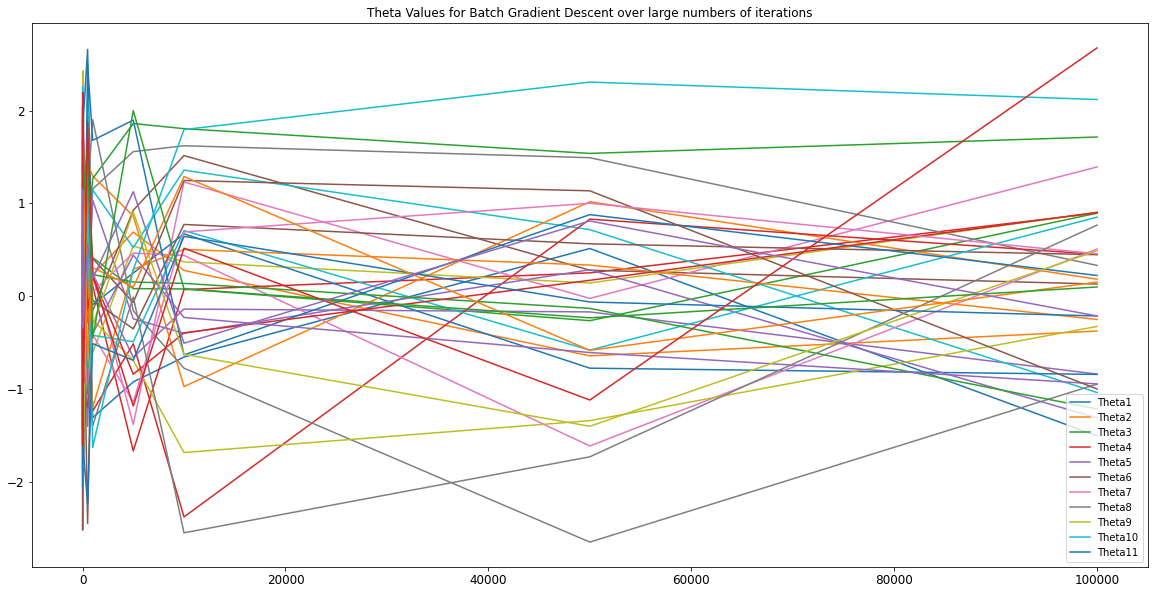

In [0]:
from matplotlib.pylab import figure
figure(figsize=(20,10))
theta_legend = ["Theta1","Theta2","Theta3","Theta4","Theta5","Theta6","Theta7","Theta8","Theta9", "Theta10", "Theta11"]


for row in theta_result_matrix:

  plt.plot(iter_array, row, label = theta_legend)
  
plt.title("Theta Values for Batch Gradient Descent over large numbers of iterations")
plt.legend(theta_legend)
plt.show()

### Ridge regression (Without regularized regression)


In [0]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(max_iter = 10000).fit(X_train_scaled, y_train)

print('Fake News dataset')
print('lasso regression linear model intercept: {}'
     .format(linridge.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('Non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linridge.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_df), linridge.coef_[0])),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Fake News dataset
lasso regression linear model intercept: [0.35034759]
lasso regression linear model coeff:
[[  35.68897114   94.57236937  233.54036958    8.75913455   77.71551829
   246.59831291 1246.66607442   51.14274389   74.05225607    0.
   108.88956721 2222.62361597  197.13662369  103.94955338   10.07315742
     2.99664358   32.47112584  274.41961986   11.49114428   69.98942659
    19.28599309   14.61062991   11.0087298     4.88323161  152.97423031
   495.3641238   358.66848353  240.99172451  207.91266662  188.09664837
    12.07264301    2.98827934   12.76076467   11.57112721]]
Non-zero features: 33
R-squared score (training): 0.999
R-squared score (test): 0.999

Features with non-zero weight (sorted by absolute magnitude):
	NN, 2222.624
	JJ, 1246.666
	VBD, 495.364
	VBG, 358.668
	RB, 274.420
	IN, 246.598
	VBN, 240.992
	DT, 233.540
	VBP, 207.913
	NNS, 197.137
	VBZ, 188.097
	VB, 152.974
	MD, 108.890
	NNP, 103.950
	CD, 94.572
	FW, 77.716
	JJS, 74.052
	PRP, 69.989
	JJR, 51.143
	CC,

### Ridge regression (With regularized regression)



In [0]:
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Alpha = 0.00
num abs(coeff) > 1.0: 34, r-squared training: 1.00, r-squared test: 1.00

Alpha = 1.00
num abs(coeff) > 1.0: 33, r-squared training: 1.00, r-squared test: 1.00

Alpha = 10.00
num abs(coeff) > 1.0: 31, r-squared training: 0.99, r-squared test: 0.99

Alpha = 20.00
num abs(coeff) > 1.0: 30, r-squared training: 0.99, r-squared test: 0.99

Alpha = 50.00
num abs(coeff) > 1.0: 33, r-squared training: 0.97, r-squared test: 0.97

Alpha = 100.00
num abs(coeff) > 1.0: 33, r-squared training: 0.95, r-squared test: 0.95

Alpha = 1000.00
num abs(coeff) > 1.0: 33, r-squared training: 0.61, r-squared test: 0.61



## Lasso (Without Regularization parameter)


In [0]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Fake News dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_df), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Fake News dataset
lasso regression linear model intercept: [60.2207837]
lasso regression linear model coeff:
[   0.            0.            0.            0.            0.
   55.86818711 1917.17417352    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.          586.86197884   62.58515887    0.
    0.            0.            0.            0.          100.48067359
  900.83718228    0.            0.          600.18060345    0.
    0.            0.            0.            0.        ]
Non-zero features: 7
R-squared score (training): 0.921
R-squared score (test): 0.926

Features with non-zero weight (sorted by absolute magnitude):
	JJ, 1917.174
	VBD, 900.837
	VBP, 600.181
	RB, 586.862
	VB, 100.481
	RBR, 62.585
	IN, 55.868


## Lasso (With Regularization parameter)



In [0]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 10, r-squared training: 0.99, r-squared test: 0.99

Alpha = 1.00
Features kept: 9, r-squared training: 0.97, r-squared test: 0.98

Alpha = 2.00
Features kept: 7, r-squared training: 0.92, r-squared test: 0.93

Alpha = 3.00
Features kept: 5, r-squared training: 0.85, r-squared test: 0.85

Alpha = 5.00
Features kept: 4, r-squared training: 0.62, r-squared test: 0.63

Alpha = 10.00
Features kept: 1, r-squared training: 0.01, r-squared test: 0.01

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00



## Polynomial Regression


In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

for deg in [2,3,4]:
  poly = PolynomialFeatures(degree=deg)
  X_poly = poly.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
  linreg = LinearRegression().fit(X_train, y_train)
  print("Poly deg", deg)
  #print('poly linear model coeff (w):\n{}'
  #    .format(linreg.coef_))
  #print('(poly deg 2) linear model intercept (b): {:.3f}'
  #     .format(linreg.intercept_))
  print('poly R-squared score (training): {:.3f}'
      .format(linreg.score(X_train, y_train)))
  print('poly R-squared score (test): {:.3f}\n'
      .format(linreg.score(X_test, y_test)))

Poly deg 2
poly R-squared score (training): 1.000
poly R-squared score (test): 1.000



KeyboardInterrupt: ignored

As can be seen, polynomial regression causes extreeme overfitting for all degrees